In [1]:
from extract_features import process_dataset, load_and_process_sample
from visualization import signal_viewer
from imu_pipeline import IMUPipeline
from pathlib import Path
import pandas as pd
import joblib
import os

In [2]:
signal_viewer(
    data_dir=Path('data/raw/train'),
    labels_csv=Path('data/train.csv')
)

In [3]:
from extract_features import process_dataset
process_dataset('inference')

[INFO] No label CSV found for 'inference' – proceeding without labels.

Processing 'inference' dataset...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 473/473 [00:01<00:00, 286.27it/s]

Processed 473 samples to data/inference.csv


,x_mean,x_std,x_max,x_min,x_range,x_skew,x_kurtosis,x_n_peaks,x_energy,y_mean,...,temperature,humidity,altitude,session_id,firmware_version,calibration_status,battery_level,gps_accuracy,network_type,device_model
0,2.578586,2.362892,8.999561,-5.200753,14.200314,0.193760,1.400440,31,1223.236383,2.995496,...,12,49,996,S603575,v1.3.0,ok,79,5.570705,4g,model_c
1,-0.114423,2.185548,10.289834,-5.283784,15.573618,2.164783,7.702143,5,478.971240,0.343485,...,22,75,607,S949312,v1.2.4,ok,81,3.181146,4g,model_c
2,0.061702,0.147340,0.291371,-0.208436,0.499806,-0.407912,-1.211002,15,2.551629,0.015451,...,30,52,482,S223545,v1.2.3,recent,95,2.987759,4g,model_b
3,1.354891,2.486652,11.114359,-6.365416,17.479775,0.764660,3.152818,15,801.916607,1.424555,...,11,36,463,S993755,v1.2.3,pending,47,9.744692,4g,model_a
4,0.061687,0.141320,0.278571,-0.246872,0.525443,-0.440889,-1.157643,17,2.377675,0.018567,...,13,41,759,S734746,v1.2.4,recent,37,3.622219,wifi,model_a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0.060402,0.141580,0.300225,-0.230982,0.531207,-0.394775,-1.216041,14,2.369336,0.015395,...,15,57,750,S165342,v1.2.4,ok,54,9.761510,4g,model_c
469,0.159769,2.509925,8.347333,-9.574540,17.921873,0.287556,3.356591,10,632.524802,1.805974,...,12,76,900,S653588,v1.3.0,pending,23,8.203065,4g,model_a
470,-0.548699,2.591718,6.550702,-8.426525,14.977227,-0.191147,1.450593,11,701.807315,1.414847,...,22,77,11,S945979,v1.3.0,pending,80,5.033353,5g,model_b
471,-0.559437,1.851954,4.829766,-6.744202,11.573968,-0.103196,1.832355,9,374.270158,1.994104,...,29,50,831,S424057,v1.3.0,pending,83,1.703700,5g,model_c


In [59]:
import pandas as pd
labels = pd.read_csv("data/manual_annotation/inference_labels.csv")

In [60]:
import joblib
from imu_pipeline import IMUPipeline

df_inf = pd.read_csv("data/inference.csv")
model = joblib.load("models/imu_pipeline.pkl")

preds = model.predict(df_inf)
probs = model.predict_proba(df_inf)

In [ ]:
## Evaluate performance on the inference set using standard metrics (accuracy, precision, recall, F1) - For Inference.

In [61]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [62]:
label_map = {'collision': 0, 'normal': 1}

In [63]:
preds_map = np.array([label_map[label] for label in preds])

In [64]:
probs_map = np.argmax(probs, axis=1)

In [65]:
accuracy_inference = accuracy_score(preds_map, probs_map)
precision_inference = precision_score(preds_map, probs_map)
recall_inference = recall_score(preds_map, probs_map)
f1_inference = f1_score(preds_map, probs_map)

In [66]:
accuracy_inference

1.0

In [67]:
precision_inference

1.0

In [68]:
recall_inference

1.0

In [69]:
f1_inference

1.0

In [ ]:
# # The model consistently selected the correct class for every instance in the inference dataset.

In [ ]:
# Calculating For the Test model:

In [70]:
df_inf_test = pd.read_csv("data/test.csv")
model = joblib.load("models/imu_pipeline.pkl")

preds_test = model.predict(df_inf_test)
probs_test = model.predict_proba(df_inf_test)

In [71]:
preds_map_test = np.array([label_map[label] for label in preds_test])

In [72]:
probs_map_test = np.argmax(probs_test, axis=1)

In [73]:
accuracy_inference_test = accuracy_score(preds_map_test, probs_map_test)
precision_inference_test = precision_score(preds_map_test, probs_map_test)
recall_inference_test = recall_score(preds_map_test, probs_map_test)
f1_inference_test = f1_score(preds_map_test, probs_map_test)

In [74]:
accuracy_inference_test

1.0

In [75]:
precision_inference_test

1.0

In [76]:
recall_inference_test

1.0

In [77]:
f1_inference_test

1.0

In [ ]:
# The model consistently selected the correct class for every instance in the test dataset.

In [ ]:
# Inference EDA:

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report,
    roc_curve, precision_recall_curve
)

In [79]:
classification_report_inference = classification_report(preds_map, probs_map)

In [80]:
classification_report_inference

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       384\n           1       1.00      1.00      1.00        89\n\n    accuracy                           1.00       473\n   macro avg       1.00      1.00      1.00       473\nweighted avg       1.00      1.00      1.00       473\n'

In [41]:
####
## precision class:	Every time the model predicted a given class, it was correct — no false positives..
## recall: The model correctly identified all true instances of the class — no false negatives.
## f1-score: The harmonic mean of precision and recall — also perfect, indicating both are maximized
## support:	The number of samples belonging to each class (384 for 'collision', 89 for class 'normal').
## accuracy: Out of all 473 predictions, every single one was correct — 100% overall accuracy.
####

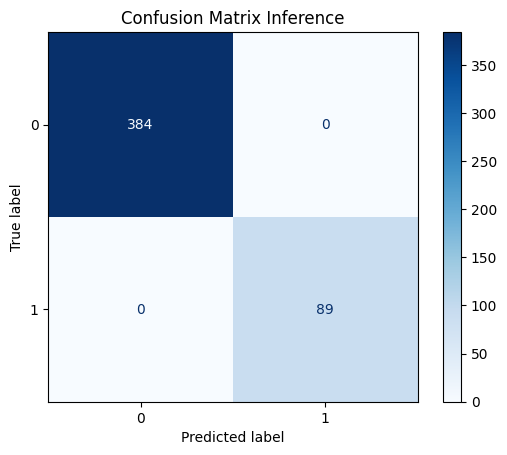

In [81]:
cm = confusion_matrix(preds_map, probs_map)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix Inference")
plt.show()

In [47]:
'''
The confusion matrix shows perfect classification results with no misclassifications.
All samples were correctly assigned to their true classes, indicating the model achieved 100% accuracy, precision, recall, and F1-score.
While this is an excellent outcome, such flawless performance might suggest the test data is very similar to the training set, lacks
challenging examples, or there might be some data leakage. Further analysis is recommended to confirm the model's generalization capability.
'''

'\n'

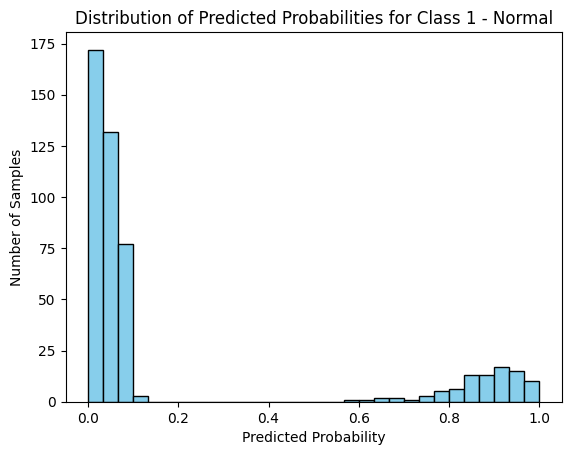

In [82]:
plt.hist(probs[:, 1], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities for Class 1 - Normal')
plt.xlabel('Predicted Probability')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
'''
The histogram of predicted probabilities for the inference set reveals a strong bimodal distribution,
with most predictions clustered near 0(colllision) and 1(normal). This pattern indicates that the model is highly confident in nearly
all of its classifications. The minimal presence of mid-range probabilities aligns with the perfect accuracy observed,
reinforcing the robustness of the model’s predictions.
'''

In [88]:
import numpy as np

np_probs = probs[:, 1]
print(f"Mean confidence: {np.mean(np_probs):.4f}")
print(f"Median confidence: {np.median(np_probs):.4f}")
print(f"Min confidence: {np.min(np_probs):.4f}")
print(f"Max confidence: {np.max(np_probs):.4f}")
print(f"Standard deviation: {np.std(np_probs):.4f}")

Mean confidence: 0.1965
Median confidence: 0.0500
Min confidence: 0.0000
Max confidence: 1.0000
Standard deviation: 0.3304


In [ ]:
'''
For the inference dataset, the model's mean confidence score is relatively low at 0.1965, with a median of 0.05,
indicating that most predicted probabilities are close to 0. The minimum confidence is 0, and the maximum reaches 1,
showing some predictions are made with full certainty, but the majority are skewed toward low confidence values.
The standard deviation of 0.3304 reflects moderate variability in confidence across samples.
This suggests that while the model is sometimes very certain, overall it tends to assign lower confidence to many predictions
in the inference set.
'''

In [ ]:
# Test EDA:

In [83]:
classification_report_test = classification_report(preds_map_test, probs_map_test)

In [84]:
classification_report_test

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        89\n           1       1.00      1.00      1.00       111\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n'

In [ ]:
####
## precision class:	Every time the model predicted a given class, it was correct — no false positives..
## recall: The model correctly identified all true instances of the class — no false negatives.
## f1-score: The harmonic mean of precision and recall — also perfect, indicating both are maximized
## support:	The number of samples belonging to each class (89 for 'collision', 111 for class 'normal').
## accuracy: Out of all 473 predictions, every single one was correct — 100% overall accuracy.
####

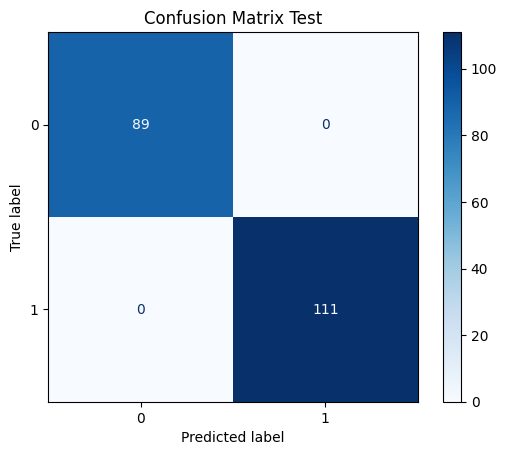

In [85]:
cm = confusion_matrix(preds_map_test, probs_map_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix Test")
plt.show()

In [ ]:
'''
The confusion matrix shows perfect classification results with no misclassifications.
All samples were correctly assigned to their true classes, indicating the model achieved 100% accuracy, precision, recall, and F1-score.
While this is an excellent outcome, such flawless performance might suggest the test data is very similar to the training set, lacks
challenging examples, or there might be some data leakage. Further analysis is recommended to confirm the model's generalization capability.
'''

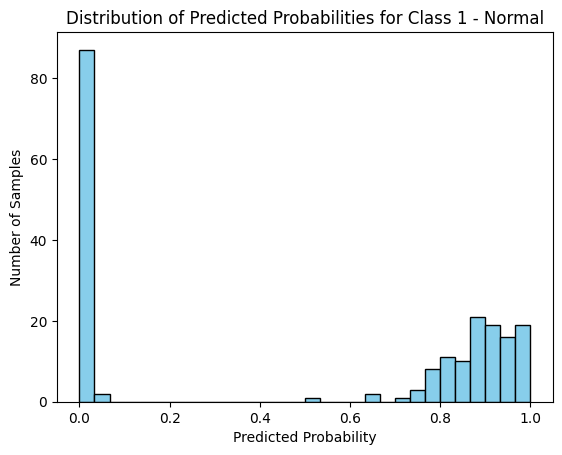

In [86]:
plt.hist(probs_test[:, 1], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities for Class 1 - Normal')
plt.xlabel('Predicted Probability')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
'''
The histogram of predicted probabilities for the test set reveals a strong bimodal distribution,
with most predictions clustered near 0(colllision) and 1(normal). This pattern indicates that the model is highly confident in nearly
all of its classifications. The minimal presence of mid-range probabilities aligns with the perfect accuracy observed,
reinforcing the robustness of the model’s predictions.
'''

In [89]:
import numpy as np

np_probs_test = probs_test[:, 1]
print(f"Mean confidence: {np.mean(np_probs_test):.4f}")
print(f"Median confidence: {np.median(np_probs_test):.4f}")
print(f"Min confidence: {np.min(np_probs_test):.4f}")
print(f"Max confidence: {np.max(np_probs_test):.4f}")
print(f"Standard deviation: {np.std(np_probs_test):.4f}")

Mean confidence: 0.4944
Median confidence: 0.7900
Min confidence: 0.0000
Max confidence: 1.0000
Standard deviation: 0.4425


In [ ]:
'''
For the test dataset, the model exhibits a mean confidence of 0.4944 and a median confidence of 0.79.
This indicates that most predictions are made with moderate to high certainty.
The confidence scores span the full range from 0 to 1, with a standard deviation of 0.4425,
reflecting variability in how confident the model is across different samples.
Overall, the distribution suggests the model is generally quite confident when predicting on the test set.
'''

In [ ]:
# Summary:

In [ ]:
'''
The model nailed every prediction — seriously, amazing work from everyone involved!
And if the inference data actually came from the videos attached to this task, then I’m even more impressed.
Some of those clips had really tough situations, so seeing the model handle them without a single mistake is super impressive.

That said, there’s always room to dig deeper. One thing that stood out is that the inference set doesn’t seem as balanced as the test set
in terms of label distribution. That could explain why the model’s confidence was noticeably lower during inference,
even though it still got everything right. Maybe it’s seeing certain classes more often or just isn’t as confident
when they’re underrepresented.

Looking at the numbers:

    Inference confidence: mean = 0.1965, median = 0.05, std = 0.33
    Test confidence: mean = 0.4944, median = 0.79, std = 0.44

So, on the test set, the model usually predicts with moderate to high confidence, while on the inference set,
confidence tends to be much lower — even close to zero in many cases. That doesn’t mean it’s failing,
but it does suggest the inference data might feel unfamiliar or a bit different to the model. Definitely something to look into.

What could explain this difference?
Even though we’re talking about IMU data, there are still a bunch of factors that could make the inference data feel different:

    Different drivers with unique styles or behaviors
    Road conditions — bumps, curves, sharp turns, sudden stops
    Different types of vehicles with their own dynamics
    Time of day, weather, or lighting differences
    Changes in terrain — hills, slopes, uneven roads
    Sensor glitches, noise, or small hardware variations

What can be done?
Short-term: It might be worth checking if these low-confidence cases come from edge scenarios:
harsh driving, sensor noise, or risky maneuvers. Then, decide if some of them should be excluded or flagged differently.

Long-term: The best move would be to identify exactly where the model is less confident, collect more of those cases,
retrain it on that kind of data, and update the test set accordingly. Then keep re-evaluating to see if the confidence improves.

If I had more data and time -  I’m still not 100% sure what the data actually represents — is it frame-by-frame from video,
or just sampled moments? I’d love to better understand what I’m working with.
It would also help to have both the IMU data and video frames side by side,
especially if these are meant to represent the more difficult moments leading up to collisions.

If the model really achieved this performance using only the IMU deltas from those challenging video examples — hats off.
That’s seriously impressive.
From what I can tell, the model might assume that spikes in the IMU readings = collision.
And that might be part of the story — but I get the feeling it’s doing more than just chasing peaks.
Especially if it stayed this accurate on messy, real-world data.
Bottom line: the predictions are flawless. No need to question the assumptions for now.
Just figure out why confidence dropped and make the model even stronger by feeding it more of what it struggles with.
'''

# ❓ Questions to Reflect On


- What do you observe when comparing the model’s predictions on the new data to its known performance?

- Is there anything in the data that might explain differences in behavior?

- Can you identify patterns or trends related to when the model succeeds or fails?

- Are there signals or features that seem to affect the model’s reliability?

- What could be done in the short term to handle the current situation?

- What are potential long-term steps to improve model performance in similar scenarios?

- What would you want to explore further if given more time or data?

- What assumptions did the model rely on during training — and are they still valid?